In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Practice 1
붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 커널 인수 kernel과 슬랙 변수 가중치 인수 C는 각각 linear, 1e10으로 한다.

- 특징 변수를 꽃받침의 길이와 폭만 사용한다.
- 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.

In [2]:
iris = load_iris()

In [3]:
print(iris.feature_names)
X = iris.data[:,[0,1]][:100]
X[:3]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [4]:
print(iris.target_names)
y = iris.target[:100]
set(y)

['setosa' 'versicolor' 'virginica']


{0, 1}

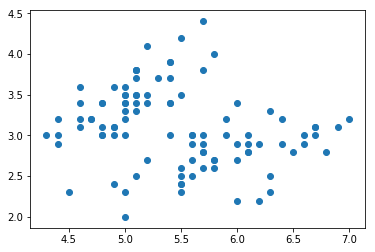

In [5]:
plt.scatter(X[:,[0]], X[:,[1]])

In [6]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [7]:
model.n_support_

array([2, 2], dtype=int32)

In [8]:
model.support_

array([36, 41, 57, 84], dtype=int32)

In [9]:
model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

In [10]:
y[model.support_]

array([0, 0, 1, 1])

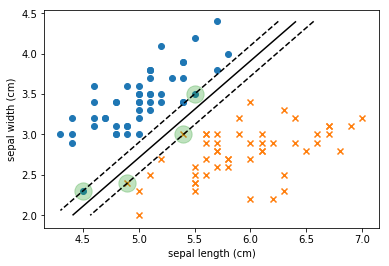

In [11]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

In [12]:
x_new = X[0]
model.decision_function([x_new])

array([-3.52742505])

In [13]:
model.coef_.dot(x_new) + model.intercept_

array([-3.52742505])

In [14]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-15.44361663, -18.36202074,  17.32736257,  16.47827481]])

In [15]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.dual_coef_[0][2] * model.support_vectors_[2].dot(x_new) + \
model.dual_coef_[0][3] * model.support_vectors_[3].dot(x_new) + \
model.intercept_

array([-3.52742505])

## Practice 2
붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel는 각각 linear로 한다. 슬랙 변수 가중치 인수 C를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.

- 특징 변수를 꽃잎의 길이와 폭만 사용한다.
- 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.

In [16]:
print(iris.feature_names)
X = iris.data[:,[1,2]][50:150]
X[:3]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[3.2, 4.7],
       [3.2, 4.5],
       [3.1, 4.9]])

In [17]:
print(iris.target_names)
y = iris.target[50:150]
set(y)

['setosa' 'versicolor' 'virginica']


{1, 2}

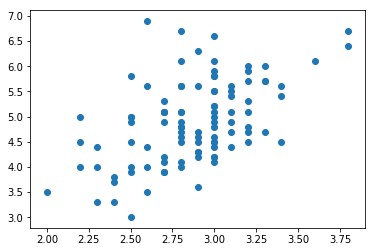

In [18]:
plt.scatter(X[:,[0]], X[:,[1]])

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)
model2 = SVC(kernel='linear', C=1e5).fit(X, y)
model3 =SVC(kernel='linear', C=1).fit(X, y)

In [20]:
model.n_support_

array([7, 8], dtype=int32)

In [21]:
model.support_

array([ 0, 18, 20, 22, 27, 33, 36, 56, 64, 76, 77, 88, 91, 95, 97],
      dtype=int32)

In [22]:
model.support_vectors_

array([[3.2, 4.7],
       [2.2, 4.5],
       [3.2, 4.8],
       [2.5, 4.9],
       [3. , 5. ],
       [2.7, 5.1],
       [3.1, 4.7],
       [2.5, 4.5],
       [2.8, 5.1],
       [2.8, 4.8],
       [3. , 4.9],
       [3. , 4.8],
       [3.1, 5.1],
       [3. , 5.2],
       [3. , 5.2]])

In [23]:
y[model.support_]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

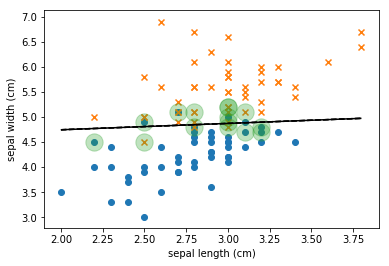

In [24]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

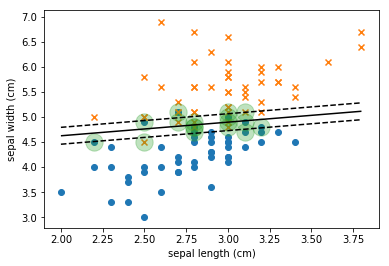

In [25]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model2.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model2.support_vectors_[:, 0], 
            model2.support_vectors_[:, 1], 
            s=300, alpha=0.3)

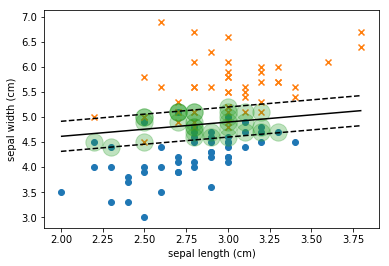

In [26]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model3.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model3.support_vectors_[:, 0], 
            model3.support_vectors_[:, 1], 
            s=300, alpha=0.3)

## Practice 3

MNIST Digit Image 분류 문제를 서포트 벡터 머신으로 풀어보자.

In [27]:
mnist = load_digits()

In [28]:
X = mnist.data
y = mnist.target

In [29]:
from sklearn.svm import SVC
model = SVC(C=1e10, gamma='auto').fit(X, y)

In [30]:
model.n_support_

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int32)

In [31]:
model.support_

array([   0,   10,   20, ..., 1786, 1792, 1795], dtype=int32)

In [32]:
model.support_vectors_

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [33]:
y[model.support_]

array([0, 0, 0, ..., 9, 9, 9])

In [34]:
predict_y = model.predict(X)

In [35]:
predict_y

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
sum(predict_y - y)

0